### 2D Packet Visualization_ Single Packet_Plotly ###

In [7]:
from tardis import run_tardis
from tardis.io.config_reader import Configuration

In [8]:
# Reading the Configuration stored in `tardis_example.yml` into config

config = Configuration.from_yaml("tardis_example.yml")

In [9]:
config["montecarlo"]["tracking"]["track_rpacket"]=True

# 3 point into photsphere
# config["montecarlo"]["seed"]= 8735653

# normal straight
# config["montecarlo"]["seed"]= 4278055

# l curve
# config["montecarlo"]["seed"]= 1298533

# all across the photosphere
# config["montecarlo"]["seed"]= 25

config["montecarlo"]["seed"]= 8235080
config["montecarlo"]["no_of_packets"]=10
config["montecarlo"]["iterations"]=1
config["montecarlo"]["last_no_of_packets"]=10
config["montecarlo"]["no_of_virtual_packets"]=0

In [10]:
sim = run_tardis(config, show_progress_bars=False)

[tardis.plasma.standard_plasmas][INFO   ]  
	
	Reading Atomic Data from kurucz_cd23_chianti_H_He.h5 (standard_plasmas.py:93)
[tardis.io.atom_data.util][INFO   ]  
	
	Atom Data kurucz_cd23_chianti_H_He.h5 not found in local path.
	Exists in TARDIS Data repo /home/jayant/Downloads/tardis-data/kurucz_cd23_chianti_H_He.h5 (util.py:33)
[tardis.io.atom_data.base][INFO   ]  
	Reading Atom Data with: UUID = 6f7b09e887a311e7a06b246e96350010 MD5  = 864f1753714343c41f99cb065710cace  (base.py:249)
[tardis.io.atom_data.base][INFO   ]  
	Non provided Atomic Data: synpp_refs, photoionization_data, yg_data, two_photon_data (base.py:253)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 1 of 1 (base.py:381)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 6.557e+42 erg / s
	Luminosity absorbed  = 4.071e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:555)
[tardis.simulation.base][INFO   ]  
	
	Simulation finished in 1 iterations 
	Simulation took 0.04 s
 (base.py:476

<div class="alert alert-info">
    
Note

When running this notebook locally or in interactive mode, a [convergence plot](io/visualization/convergence_plot.ipynb) will show up.

</div>

In [11]:
sim.runner.rpacket_tracker_df

status        seed             r            nu        mu  \
index step                                                             
0     0          0  3463712618  1.235520e+15  3.929924e+14  0.941856   
      1          0  3463712618  1.286064e+15  3.929924e+14  0.946463   
      2          0  3463712618  1.336608e+15  3.929924e+14  0.950539   
      3          0  3463712618  1.387152e+15  3.929924e+14  0.954163   
      4          0  3463712618  1.437696e+15  3.929924e+14  0.957400   
...            ...         ...           ...           ...       ...   
9     17         0  1332419245  2.044224e+15  9.509632e+14  0.900802   
      18         0  1332419245  2.094768e+15  9.509632e+14  0.905778   
      19         0  1332419245  2.145312e+15  9.509632e+14  0.910382   
      20         0  1332419245  2.195856e+15  9.509632e+14  0.914651   
      21         1  1332419245  2.246400e+15  9.509632e+14  0.918617   

              energy  shell_id  interaction_type  
index step                                        
0     0     0.103580         0                -1  
      1     0.103580         1                -1  
      2     0.103580         2                -1  
      3     0.103580         3                -1  
      4     0.103580         4                -1  
...              ...       ...               ...  
9     17    0.102448        16                 1  
      18    0.102448        17                 1  
      19    0.102448        18                 1  
      20    0.102448        19                 1  
      21    0.102448        19                 1  

[169 rows x 8 columns]

In [12]:
sim.runner.rpacket_tracker_df.index[-1][0]+1

10

In [13]:
sim.model.radius

<Quantity [1.235520e+15, 1.286064e+15, 1.336608e+15, 1.387152e+15,
           1.437696e+15, 1.488240e+15, 1.538784e+15, 1.589328e+15,
           1.639872e+15, 1.690416e+15, 1.740960e+15, 1.791504e+15,
           1.842048e+15, 1.892592e+15, 1.943136e+15, 1.993680e+15,
           2.044224e+15, 2.094768e+15, 2.145312e+15, 2.195856e+15,
           2.246400e+15] cm>

#### Plotly plots ####

In [14]:
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objects as go
import math
import pandas as pd
import numpy as np
import random
from IPython.core.debugger import set_trace

### Mathematical expression for finding coordinates ###

\
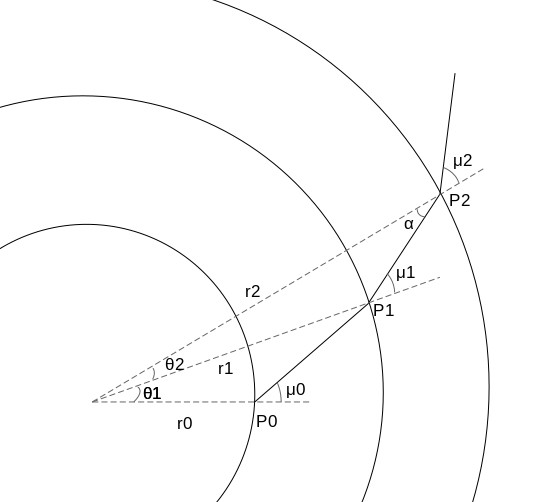

<br><br>The diagram above shows the packet trajectory as it starts from photosphere `P0` and continues to move along the subsequent points `P1`, `P2` and so on.

<div class="alert alert-info">
    <b>Note:</b><br>
    Here μ is the angle of direction of packet propagation with respect to line joining the center.
</div>

To determine the polar coordinates of any arbitrary point, let say `P2`, we need `r2` and `θ2`. `r2` is already present in the array obtained from the simulation. To determine `θ2`, we use sine rule and apply it on triangle `OP1P2`, where `O` is the center.

$$
\frac{r_{2}}{\sin(\pi - \mu_{1})} = \frac{r_{1}}{\sin(\alpha)}
$$

Now, writing `α` in terms of `μ1` and `θ2`

$$ 
α = μ_{1} - θ_{2} \\ \\
\frac{r_{2}}{\sin(\pi - \mu_{1})} = \frac{r_{1}}{\sin(μ_{1} - θ_{2})}
$$

Thus,

$$ 
θ_{2} = -\sin^{-1}(\frac{r1}{r2}\sin(\mu_{1})) + \mu_{1}
$$

Hence, for `ith` point, `θ` will be:

$$ 
θ_{i} = -\sin^{-1}(\frac{r_{i-1}}{r_{i}}\sin(\mu_{i-1})) + \mu_{i-1}
$$

In [15]:
# function for getting x y coordinates
def get_x_y(r_track,mu_track,direction="normal"):
    xs,ys,theta=[],[],[]
    
    for i in range(len(r_track)):
        if(i==0):
            theta.append(0)
        else:
            if(direction == 'random' or direction == 'r'):
                multiplier = random.choice([-1,1])
            elif(direction == 'opposite' or direction == 'o'):
                multiplier = -1
            else:
                multiplier = 1
            if (r_track[i]<r_track[i-1]):
                theta.append(theta[-1] - math.pi + math.asin(r_track[i-1]*math.sin(multiplier * math.acos(mu_track[i-1]))/r_track[i]) + multiplier * math.acos(mu_track[i-1]))
            else:
                theta.append(theta[-1]+math.asin(-1*r_track[i-1]*math.sin(multiplier * math.acos(mu_track[i-1]))/r_track[i]) + multiplier * math.acos(mu_track[i-1]))
    
    xs = (np.array(r_track))*np.cos(np.array(theta))
    ys = (np.array(r_track))*np.sin(np.array(theta))
    
    return xs,ys

In [16]:
# function for getting x y coordinates
def get_x_y_with_theta_init(r_track,mu_track,direction="normal",theta_initial=0):
    xs,ys,theta=[],[],[]
    
    for i in range(len(r_track)):
        if(i==0):
            theta.append(theta_initial)
        else:
            if(direction == 'random' or direction == 'r'):
                multiplier = random.choice([-1,1])
            elif(direction == 'opposite' or direction == 'o'):
                multiplier = -1
            else:
                multiplier = 1
            if (r_track[i]<r_track[i-1]):
                theta.append(theta[-1] - math.pi + math.asin(r_track[i-1]*math.sin(multiplier * math.acos(mu_track[i-1]))/r_track[i]) + multiplier * math.acos(mu_track[i-1]))
            else:
                theta.append(theta[-1]+math.asin(-1*r_track[i-1]*math.sin(multiplier * math.acos(mu_track[i-1]))/r_track[i]) + multiplier * math.acos(mu_track[i-1]))
    
    xs = (np.array(r_track))*np.cos(np.array(theta))
    ys = (np.array(r_track))*np.sin(np.array(theta))
    
    return xs,ys

In [17]:
def get_coordinates_multiple_packets(r_packet_tracker):
    thetas = np.linspace(0, math.pi * 2,sim.runner.rpacket_tracker_df.index[-1][0]+2) 
    x = []
    y = []
    for i in range(sim.runner.rpacket_tracker_df.index[-1][0]+1):
        xs,ys = get_x_y_with_theta_init(r_packet_tracker.loc[i]["r"],r_packet_tracker.loc[i]["mu"],'n',thetas[i])
        x.append(xs)
        y.append(ys)
    return x,y

In [18]:
def get_equal_array_size(xs,ys):
    max_size = max(list(map(len,xs)))
    for i in range(len(xs)):
        xs[i] = np.append(xs[i],xs[i][-1]*np.ones([max_size-len(xs[i])]))
        ys[i] = np.append(ys[i],ys[i][-1]*np.ones([max_size-len(ys[i])]))
    return xs,ys,max_size

In [33]:
r_shells = sim.model.radius.value
xs,ys = get_coordinates_multiple_packets(sim.runner.rpacket_tracker_df)

fig = go.Figure()

# Set axes properties
fig.update_xaxes(range=[-1.1*r_shells[-1],1.1*r_shells[-1]],linecolor="#555",gridcolor="#555",zerolinecolor="#555")
fig.update_yaxes(range=[-1.1*r_shells[-1],1.1*r_shells[-1]],linecolor="#555",gridcolor="#555",zerolinecolor="#555")

# adding the shells
shell_shapes={}
for i in range(len(sim.model.radius.value)):
    if i==0:
        fig.add_shape(type="circle",
            xref="x", yref="y",
            x0=-1*sim.model.radius.value[i], y0=-1*sim.model.radius.value[i], x1=sim.model.radius.value[i], y1=sim.model.radius.value[i],
            line_color="black",
            fillcolor="darkgrey",
            opacity=1
        )
    else:
        fig.add_shape(type="circle",
            xref="x", yref="y",
            x0=-1*sim.model.radius.value[i], y0=-1*sim.model.radius.value[i], x1=sim.model.radius.value[i], y1=sim.model.radius.value[i],
            line_color="black",
            opacity=0.2
        )

#Add the packet trajectory

df = sim.runner.rpacket_tracker_df
interaction_from_num = {-1: "No Interaction", 1: "EScattering", 2: "Line"}
interaction_color_from_num = {-1: "aqua", 1: "red", 2: "blue"}
for i in range(len(xs)):    
    fig.add_trace(go.Scatter(
        x=xs[i],
        y=ys[i],
        mode="markers+lines",
        name="Packet "+str(i+1),
        hovertemplate =
        '<b>X</b>: %{x}'+
        '<br><b>Y</b>: %{y}<br>'+
        '<b>Last Interaction: %{text}</b>',
        text = [interaction_from_num.get(df.loc[i,j]["interaction_type"]) for j in range(len(xs[i]))],
        line = dict(color="cyan"),
#         line_shape = "spline",
        marker = dict(color=[interaction_color_from_num.get(df.loc[i,j]["interaction_type"]) for j in range(len(xs[i]))])
    ))


# Set figure size
fig.update_layout(width=900, height=900)
fig.layout.plot_bgcolor = '#fafafa'
fig.layout.paper_bgcolor = '#fafafa'

fig.show()

In [33]:
# r = sim.runner.rpacket_tracker[0].r
# mu = sim.runner.rpacket_tracker[0].mu
# theta = get_thetas(r,mu)

# # Converting theta array from radians to degrees
# theta=(np.array(theta)*180)/(math.pi)

# # Creating dataframe for r and theta values
# df = pd.DataFrame(r,columns=['r'])
# df['theta']=theta

# # Creating polar diagram
# fig = px.line_polar(df,r="r",theta="theta",start_angle=0, direction="counterclockwise", markers=True, template="plotly_dark")

# # Adding photosphere and the shell to the figure
# for i in range(len(sim.model.radius.value)):
#     if i==0:
#         fig.add_shape(type="circle",
#             xref="x", yref="y",
#             x0=-1*sim.model.radius.value[i], y0=-1*sim.model.radius.value[i], x1=1*sim.model.radius.value[i], y1=sim.model.radius.value[i],
#             line_color="LightSeaGreen",
#             fillcolor="PaleTurquoise",
#             opacity=0.5
#         )
#     else:
#         fig.add_shape(type="circle",
#             xref="x", yref="y",
#             x0=-1*sim.model.radius.value[i], y0=-1*sim.model.radius.value[i], x1=sim.model.radius.value[i], y1=sim.model.radius.value[i],
#             line_color="LightSeaGreen",
#             opacity=0.5
#         )

# # Setting layout width
# fig.update_layout(width=800, height=800)

# fig.show()

In [34]:
# r_shells = sim.model.radius.value
# xs,ys = get_coordinates_multiple_packets(sim.runner.rpacket_tracker)
# xs,ys,max_size = get_equal_array_size(xs,ys)

# fig = go.Figure()

# # Set axes properties
# fig.update_xaxes(range=[-1.1*r_shells[-1],1.1*r_shells[-1]],linecolor="#555",gridcolor="#555",zerolinecolor="#555",)
# fig.update_yaxes(range=[-1.1*r_shells[-1],1.1*r_shells[-1]],linecolor="#555",gridcolor="#555",zerolinecolor="#555")

# # adding the shells
# shell_shapes={}
# for i in range(len(sim.model.radius.value)):
#     if i==0:
#         fig.add_shape(type="circle",
#             xref="x", yref="y",
#             x0=-1*sim.model.radius.value[i], y0=-1*sim.model.radius.value[i], x1=sim.model.radius.value[i], y1=sim.model.radius.value[i],
#             line_color="LightSeaGreen",
#             fillcolor="PaleTurquoise",
#             opacity=0.8
#         )
#     else:
#         fig.add_shape(type="circle",
#             xref="x", yref="y",
#             x0=-1*sim.model.radius.value[i], y0=-1*sim.model.radius.value[i], x1=sim.model.radius.value[i], y1=sim.model.radius.value[i],
#             line_color="LightSeaGreen",
#             opacity=0.8
#         )

# #Add the packet trajectory

# for i in range(len(xs)):    
#     fig.add_trace(go.Scatter(
#         x=xs[i],
#         y=ys[i],
#         mode="lines+markers",
#         name="Packet "+str(i+1),
# #         marker=dict(color='aqua')
#     ))


# # Set figure size
# fig.layout.plot_bgcolor = '#000'
# fig.layout.paper_bgcolor = '#000'

# fig.update_layout(width=800, height=800,
#                   title="Packet Trajectories",
#                   title_font_color="#888",
#                   hovermode="closest",
#                   updatemenus=[dict(type="buttons",
#                                    buttons=[dict(label="Play",
#                                                 method="animate",
#                                                 args=[None])])])

# def get_frames(j):
#     frames=[]

#     for i in range(len(xs)):    
#         frames.append(go.Scatter(
#             x=xs[i].tolist()[0:j],
#             y=ys[i].tolist()[0:j],
# #             x=[xs[i].tolist()[j]],
# #             y=[ys[i].tolist()[j]],
#             mode="lines+markers",
#         ))
#     return frames
    
# fig.frames=[go.Frame(data=get_frames(i)) for i in range(max_size)]

# fig.show()